# 상관분석

In [10]:
import numpy as np
from pandas import read_excel
from scipy import stats

import sys
import seaborn as sb
from matplotlib import pyplot as plt


In [3]:
df = read_excel("https://data.hossam.kr/E03/point.xlsx")
df

,언어영역,수리영역
0,392,428
1,404,518
2,346,376
3,382,426
4,368,409
5,449,490
6,391,448


탐색적 데이터 분석

In [4]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

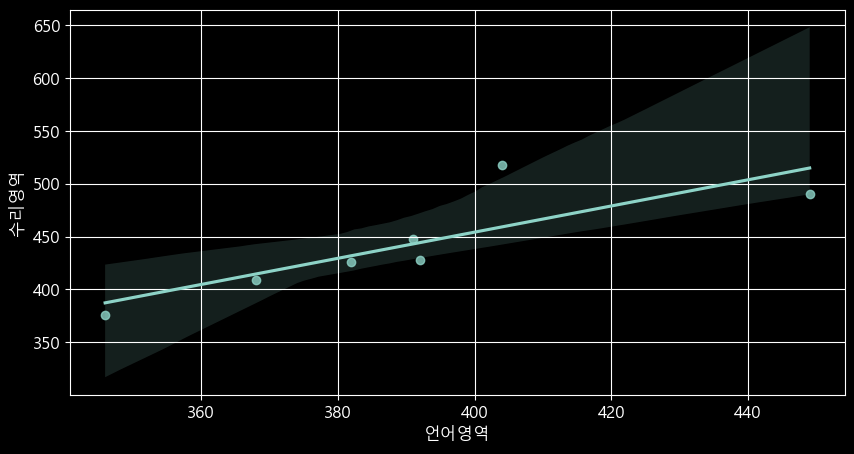

In [6]:
sb.regplot(data=df,x='언어영역',y='수리영역')
plt.grid()
plt.show()
plt.close()

## 공분산

공분산은 상관관계의 상승 혹은 하강하는 경향을 이해할 수는 있으나 2개 변수 측정 단위의 크기에 따라 값이 달라지므로 절대적 정도를 파악하기에는 한계가 있다.

결과값이 양수면 정비례, 음수면 반비례 ->그래서 잘 안씀

In [9]:
np.cov(df['언어영역'],df['수리영역'])[0,1] # 총4개의 데이터가 나오는데 기중 0,1이 바로 공분산이고 공분산은 0만 아니면 상관있는거라서 높은 숫자여도 무방

1271.9523809523807

# 상관분석

### numpy를 통한 상관계수 구하기

p-value는 알 수 없기 때문에 분석 결과를 검정할 수 없다.

In [14]:
np.corrcoef(df['언어영역'],df['수리영역'])

# 기본적으로 상관행렬을 표시한다. 
# 0,0 은 언어영역-언어영역 관계
# 1,0 은 언어영역-수리영역 관계
# 0,1 은 수리영역-수리영역 관계
# 1,1 은 수리영역-언어영역 관계

array([[1.        , 0.82106421],
       [0.82106421, 1.        ]])

상관계수를 얻기 위해서는 0,1 혹은 1,0 번째 항목을 취한다.

In [15]:
np.corrcoef(df['언어영역'], df['수리영역'])[0,1]

0.821064207442306

### 피어슨 상관계수와 p-value 구하기

In [12]:
r, p = stats.pearsonr(df['언어영역'],df['수리영역'])
r,p

(0.8210642074423062, 0.023563708235834223)

In [13]:
"상관계수: %f, p-value: %f" % (r, p)

'상관계수: 0.821064, p-value: 0.023564'

p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 그러므로 언어영역 점수와 수리영역 점수는 상관이 있다. 

### 데이터프레임 객체를 통한 상관계수 구하기

numpy를 통해 구한 결과와 동일하다.

이와 같이 표시되는 형태를 상관행렬이라고 한다.

In [18]:
corr = df.corr(method='pearson')
corr

,언어영역,수리영역
언어영역,1.000000,0.821064
수리영역,0.821064,1.000000


상관분석 결과 시각화

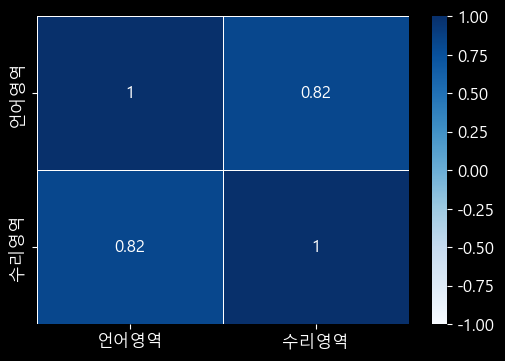

In [36]:
plt.rcParams['figure.figsize'] = (6,4)
sb.heatmap(corr,
           annot = True, # 실제 값 화면에 나타내기
           cmap = "Blues", # 색상
           vmin= -1, vmax= 1, # 색상 차트 영역
           linewidths=0.5) # 구분선 

plt.show()
plt.close()


예제 (2) - mtcars 데이터를 통한 실린더수와 연비의 상관관계 분석
R 패키지인 ggplot2에 내장된 샘플 데이터로 자동차 32종의 11개 속성에 대한 정보를 담고 있는 데이터

필드	| 설명
|--|--|
mpg	| 연료 효율성 (마일 당 갤런)
cyl	| 실린더 수
disp	| 배기량 (cubic inches)
hp	| 마력 (horsepower)
drat	| 후륜축 비율 (rear axle ratio)
wt	| 차량 무게 (1000 파운드)
qsec	| 1/4 마일 달성 시간 (초)
vs| 	V/S (V 엔진 형태인지, S는 직렬 엔진 형태인지를 나타냄)
am	| 변속기 형태 (0: 자동, 1: 수동)
gear	| 전진 기어 수 (전송 기어)
carb	| 기화기 개수 (carburetors)

In [38]:
df = read_excel("https://data.hossam.kr/E03/mtcars.xlsx", index_col='name')
df.head(10)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


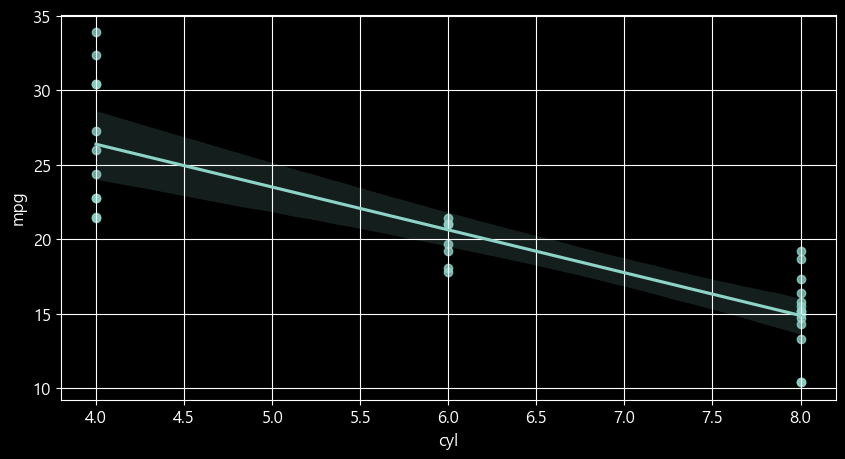

In [40]:
# 실린더 수에 따른 연비에 대한 산점도 그래프 

plt.rcParams['figure.figsize'] = (10,5)
sb.regplot(data=df,x='cyl',y='mpg')
plt.grid()
plt.show()
plt.close()

실린더 수가 증가함에 따라 연비가 낮아지는 경향이 있는 것으로 보인다. 

### 상관분석

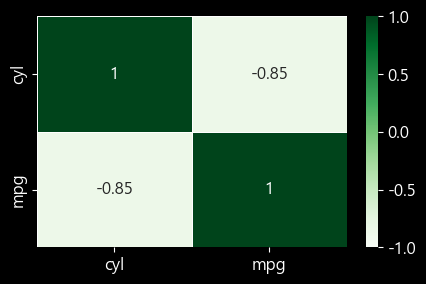

In [46]:
plt.rcParams["figure.figsize"] = (5,3)

corr = df.filter(['cyl', 'mpg']).corr(method='pearson')

sb.heatmap(corr,
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
           linewidths=.5 #구분선
)

plt.show()
plt.close()

분석결과 상관계수가 -0.85로 나타나 실린더수와 연비는 강한 음의 상관관계(반비례)가 있는 것으로 나타남

In [43]:
stats.pearsonr(df['cyl'],df['mpg'])

PearsonRResult(statistic=-0.8521619594266132, pvalue=6.112687142580964e-10)